<a href="https://colab.research.google.com/github/anirudh14397/Perceptron-Learning-Algorithm/blob/main/Perceptron_learning_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing neccessary libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

Creating a dataset

In [30]:
x,y=datasets.make_blobs(n_samples=200,centers=[[2,2],[10,10]],n_features=2,center_box=(0,10),cluster_std=2)

In [31]:
x.shape

(200, 2)

In [32]:
y

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0])

In [33]:
y.shape

(200,)

In [34]:
y[y==0]=-1

In [35]:
np.unique(y,return_counts=True)

(array([-1,  1]), array([100, 100]))

Visualize the dataset

In [36]:
def show(w,w0,x,y):
    x_val=np.linspace(-5,10)
    y_val=(-w[0]*x_val - w0)/w[1]
    plt.plot(x_val,y_val)
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.xlim(x[:,0].min()+0.2,x[:,0].max()+0.2)
    plt.ylim(x[:,1].min()+0.2,x[:,1].max()+0.2)
    plt.show()

In [37]:
w=np.random.normal(size=(2,))
w0=np.random.normal()

In [38]:
w,w0

(array([ 0.33211858, -1.26595374]), -0.7884113791090279)

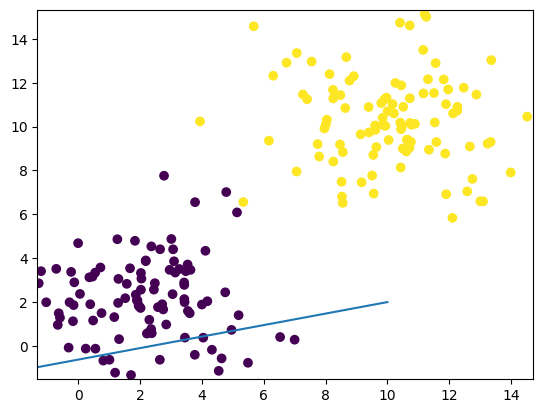

In [39]:
show(w,w0,x,y)

In [40]:
np.linalg.norm(w,ord = 1)

1.5980723220917954

In [41]:
np.linalg.norm(w)#preferred

1.3087939578024752

Implementing Perceptron Algorithm

In [42]:
def dist_point_hyperplane(w,w0,x):
    d= (np.dot(w,x)+w0)/np.linalg.norm(w)
    return d

In [43]:
def perceptron_training(x,y,w,w0,num_iter=100):
    for i in range(num_iter):
        print(f"Iteration No. : {i+1}")
        miss_classified_points = 0
        for (xi,yi) in zip(x,y):
            d= dist_point_hyperplane(w,w0,xi)
            hs=np.sign(d)
            if hs != np.sign(yi):
                miss_classified_points += 1
                w = w + ( xi * yi)
                w0 = w0 +np.sign(yi)
        print(f"Current Accuracy : {100 - (100*miss_classified_points/len(y))}")
        print(f"Weights : {w[0],w[1],w0}")
        show(w,w0,x,y)
        print("-"*50)
        if miss_classified_points == 0:
            return w, w0
    return w,w0


Iteration No. : 1
Current Accuracy : 80.5
Weights : (8.678536400281205, 6.264126884680453, -23.78841137910903)


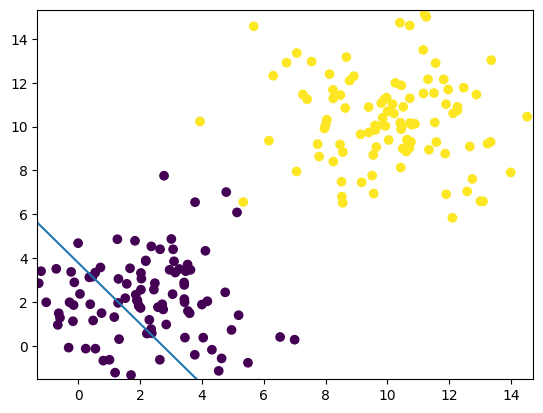

--------------------------------------------------
Iteration No. : 2
Current Accuracy : 92.0
Weights : (7.171917238188015, 4.169091407913986, -31.78841137910903)


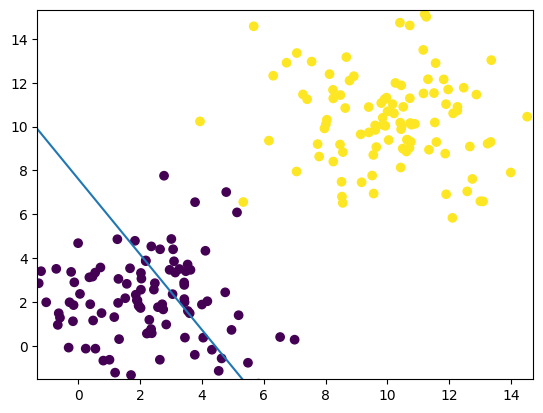

--------------------------------------------------
Iteration No. : 3
Current Accuracy : 99.5
Weights : (3.737756367858821, 2.032432787949692, -32.78841137910903)


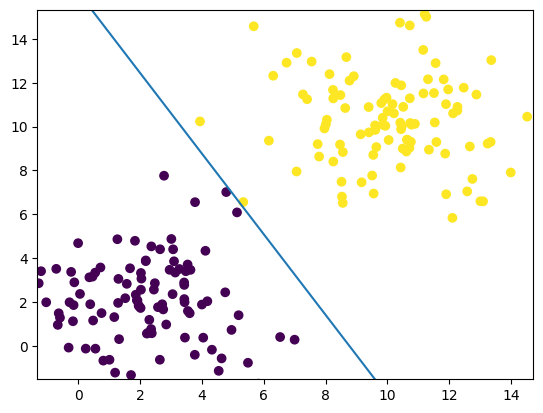

--------------------------------------------------
Iteration No. : 4
Current Accuracy : 100.0
Weights : (3.737756367858821, 2.032432787949692, -32.78841137910903)


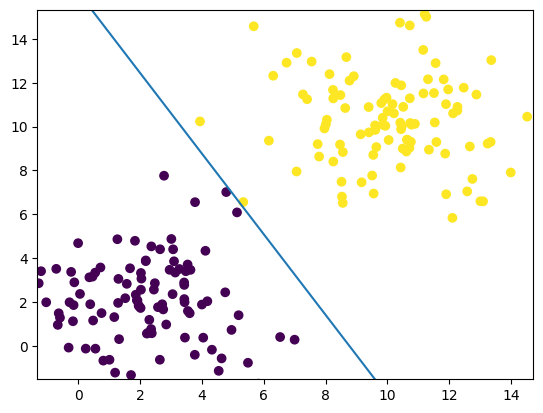

--------------------------------------------------


In [44]:
w,w0 = perceptron_training(x,y,w,w0)